In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#导入Basket表，命名为myData1
myData1=pd.read_csv('Basket.csv', encoding="gbk")
myData1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [4]:
#导入item表，命名为myData2
myData2=pd.read_csv('item.csv', encoding="gbk")
myData2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [5]:
#检测myData1是否有空值
myData1.isnull().any()

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [6]:
#检测myData2是否有空值
myData2.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

结论：两个表中都没有空值，不需要进行空值处理

In [7]:
#剔除data中bask_spend列小于0的行
myData1=myData1[myData1['BASK_SPEND']>0]
myData1

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
5,2018-06-01,D007,3,250225,77.27
6,2018-06-01,D007,3,250309,72.07
7,2018-06-01,D007,4,47502,27.21
8,2018-06-01,D007,3,250520,11.80
9,2018-06-01,D007,1,160957,141.82


In [8]:
#统计表1重复数据的数量，因为表2的销售数据是可以存在重复的情况
count = 0
for item in myData1.duplicated():
    if item == True:
        count =count + 1
count

0

结论：没有重复记录

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

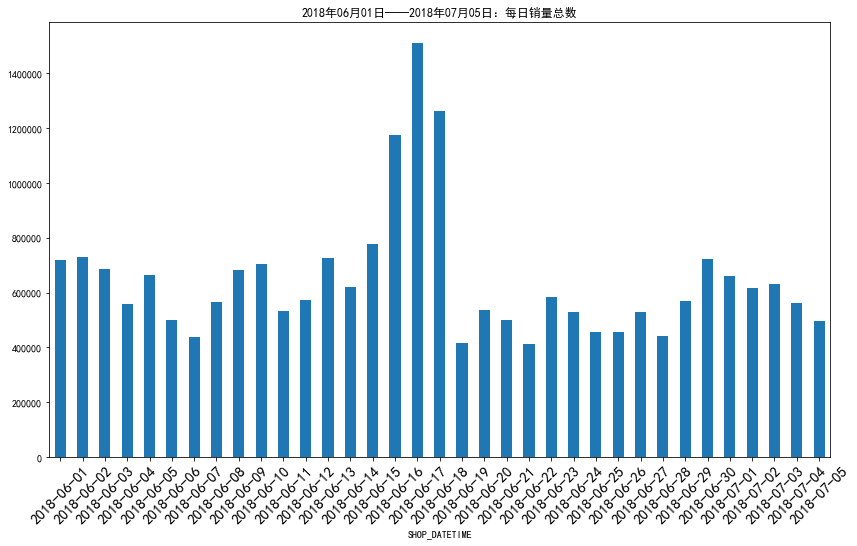

In [9]:
#绘制根据不同的日期，每日销量总数的柱状图
Bask_spend_dt=myData1['BASK_SPEND'].groupby(myData1['SHOP_DATETIME']).sum()

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
Bask_spend_dt.plot(kind='bar',title='2018年06月01日——2018年07月05日：每日销量总数',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

结论：2018年6月15日-6月17日销量最高

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

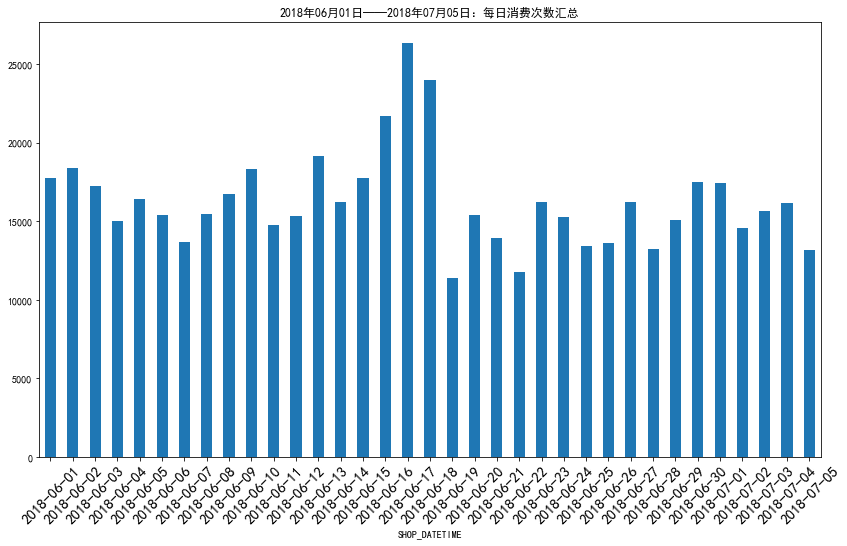

In [10]:
#绘制根据不同的日期，每日的消费次数汇总的柱状图
Bask_code_dt=myData1['BASK_CODE'].groupby(myData1['SHOP_DATETIME']).count()
Bask_code_dt.plot(kind='bar',title='2018年06月01日——2018年07月05日：每日消费次数汇总',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

结论：2018年6月15日-6月17日消费次数最多

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

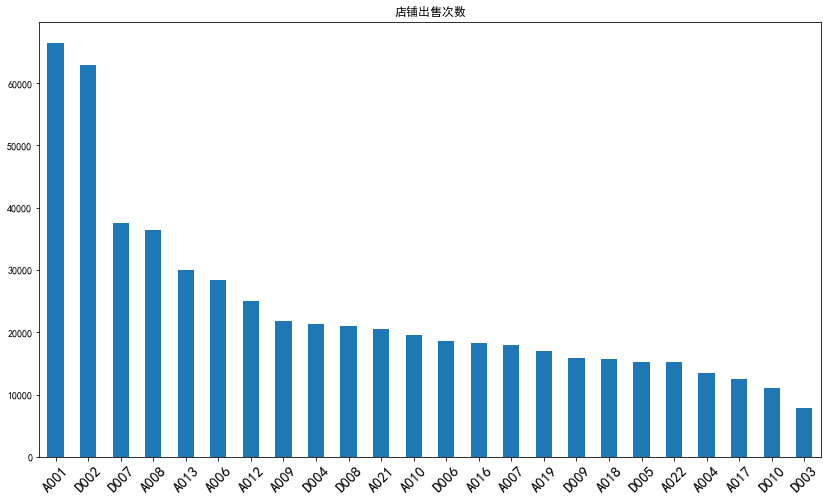

In [11]:
#统计最受欢迎店铺（根据消费次数）
Store_num=myData1['STORE_CODE'].value_counts()
Store_num.plot(kind='bar',title='店铺出售次数',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

结论 A001店铺为最受欢迎

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

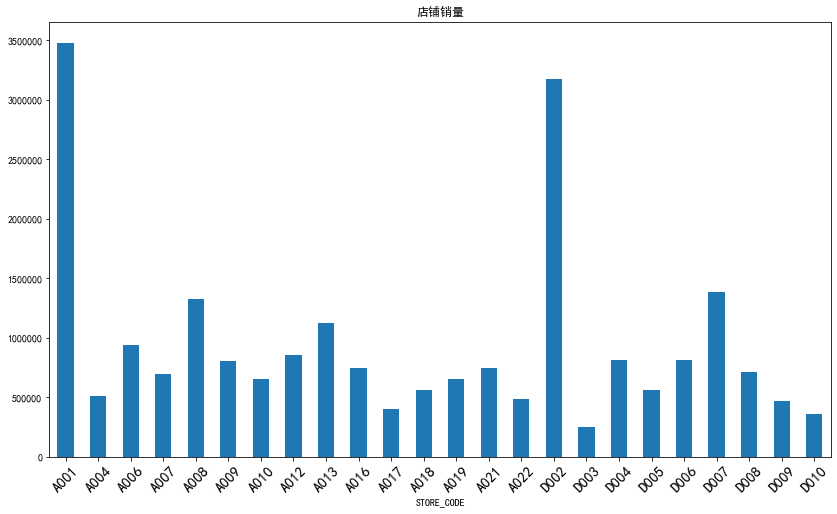

In [12]:
#店铺销量总数（根据销量）
store_code_sales=myData1['BASK_SPEND'].groupby(myData1['STORE_CODE']).sum()
store_code_sales.plot(kind='bar',title='店铺销量',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

In [13]:
import warnings#导入warnings模块
warnings.filterwarnings('ignore')#忽略所有警告信息

In [14]:
#向mydata1中新加入一列表示星期
myData1['SHOP_WEEKTIME']=''

In [15]:
#星期转换
myData1['SHOP_WEEKTIME']=myData1['SHOP_DATETIME']
myData1['SHOP_WEEKTIME'] = pd.to_datetime(myData1['SHOP_WEEKTIME'])#将“时间”字段转换为datetime类型
#将时间转换为星期的形式(周一为1, 周日为７)
#使用datetime类对象，并以整数形式返回星期几，其中返回结果是：周一为0，周日为6，对返回结果再“+1”，成为标准形式(周一为1, 周日为７)
myData1['SHOP_WEEKTIME'] = myData1['SHOP_WEEKTIME'].apply(lambda x: x.weekday() + 1)
myData1.head()#展示转换后数据

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,SHOP_WEEKTIME
0,2018-06-01,D007,3,250458,8.0,5
1,2018-06-01,D007,3,250200,32.7,5
2,2018-06-01,D007,1,161068,16.8,5
3,2018-06-01,D007,8,5325,30.4,5
4,2018-06-01,D007,8,5361,191.3,5


统计周一到周日的购买记录中对应的用户总数

In [16]:
#以时间为指标，对用户(也就是bask)进行分组，unique：返回列的所有唯一值(特征的所有唯一值)；nunique：返回的是唯一值的个数
bask = myData1.groupby('SHOP_WEEKTIME')['BASK_CODE'].nunique()
bask = bask.to_frame().reset_index()#重置索引，to_frame：将数组转换为DataFrame格式
bask.columns = ['WEEK', 'BASK_NUM']#定义列名 
bask

,WEEK,BASK_NUM
0,1,74654
1,2,66114
2,3,74671
3,4,65743
4,5,72650
5,6,82577
6,7,85984


Text(0.5, 1.0, '星期一至星期日的消费次数汇总')

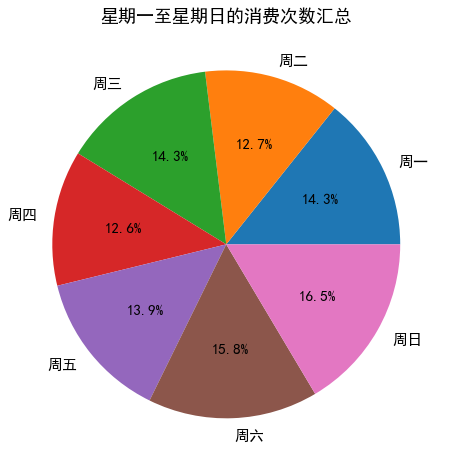

In [17]:
#星期一至星期日的消费次数汇总
plt.figure(figsize=(16, 8))
plt.rcParams["font.size"] = "15"
weeks=['周一','周二','周三','周四','周五','周六','周日']
plt.pie(bask['BASK_NUM'],labels=weeks,autopct="%3.1f%%")
plt.title('星期一至星期日的消费次数汇总')

结论：周六周日购物次数最多

----

<b>计算共有多少种商品</b>

In [51]:
#一共有多少种商品
myData2['PROD_CODE'].nunique()

19271

<b>item表中日期转换为星期</b>

In [52]:
#星期转换
myData2['SHOP_WEEKTIME']=myData2['SDATE']
myData2['SHOP_WEEKTIME'] = pd.to_datetime(myData2['SHOP_WEEKTIME'])#将“时间”字段转换为datetime类型
#将时间转换为星期的形式(周一为1, 周日为７)
#使用datetime类对象，并以整数形式返回星期几，其中返回结果是：周一为0，周日为6，对返回结果再“+1”，成为标准形式(周一为1, 周日为７)
myData2['SHOP_WEEKTIME'] = myData2['SHOP_WEEKTIME'].apply(lambda x: x.weekday() + 1)
myData2.head()#展示转换后数据

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,SHOP_WEEKTIME
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3,5
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,5
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,5
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9,5
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,5


<b>使用数据透视表获取销量前10的商品</b>

In [53]:
sell_top10 = pd.pivot_table(myData2, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(10)
sell_top10

,PROD_CODE,ITEM_QUANTITY
8537,149413,39823.000
5320,86772,31252.000
17223,220834,25644.000
1478,7133,23015.000
3886,61623,21756.000
7137,124556,19887.000
13785,205540,19302.000
301,1152,19135.000
12024,194690,18101.534
7135,124554,16641.000


<b>绘制总销量TOP10商品的柱状图</b>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

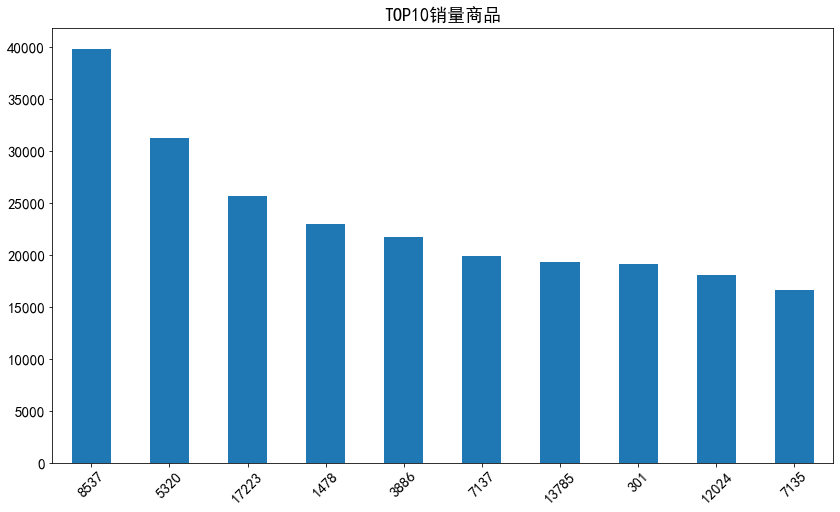

In [54]:
sell_top10['ITEM_QUANTITY'].plot(kind='bar',title='TOP10销量商品',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<b>打折过的商品的数量</b>

In [55]:
Discount_pro = myData2[myData2["DISCOUNT_AMOUNT"].values != 0 ]["PROD_CODE"]
Discount_pro.nunique()

7226

结论：共有7226种商品打过折

<b>计算周一至周日的销量TOP10</b>

In [65]:
sell_1=myData2[myData2['SHOP_WEEKTIME']==1]
sell_1_top5 = pd.pivot_table(sell_1, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_2=myData2[myData2['SHOP_WEEKTIME']==2]
sell_2_top5 = pd.pivot_table(sell_2, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_3=myData2[myData2['SHOP_WEEKTIME']==3]
sell_3_top5 = pd.pivot_table(sell_3, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_4=myData2[myData2['SHOP_WEEKTIME']==4]
sell_4_top5 = pd.pivot_table(sell_4, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_5=myData2[myData2['SHOP_WEEKTIME']==5]
sell_5_top5 = pd.pivot_table(sell_5, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_6=myData2[myData2['SHOP_WEEKTIME']==6]
sell_6_top5 = pd.pivot_table(sell_6, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

sell_7=myData2[myData2['SHOP_WEEKTIME']==7]
sell_7_top5 = pd.pivot_table(sell_7, index='PROD_CODE', values='ITEM_QUANTITY',
                      aggfunc='sum').reset_index().sort_values(by='ITEM_QUANTITY', ascending=False).head(5)

<b>绘制上述图像</b>

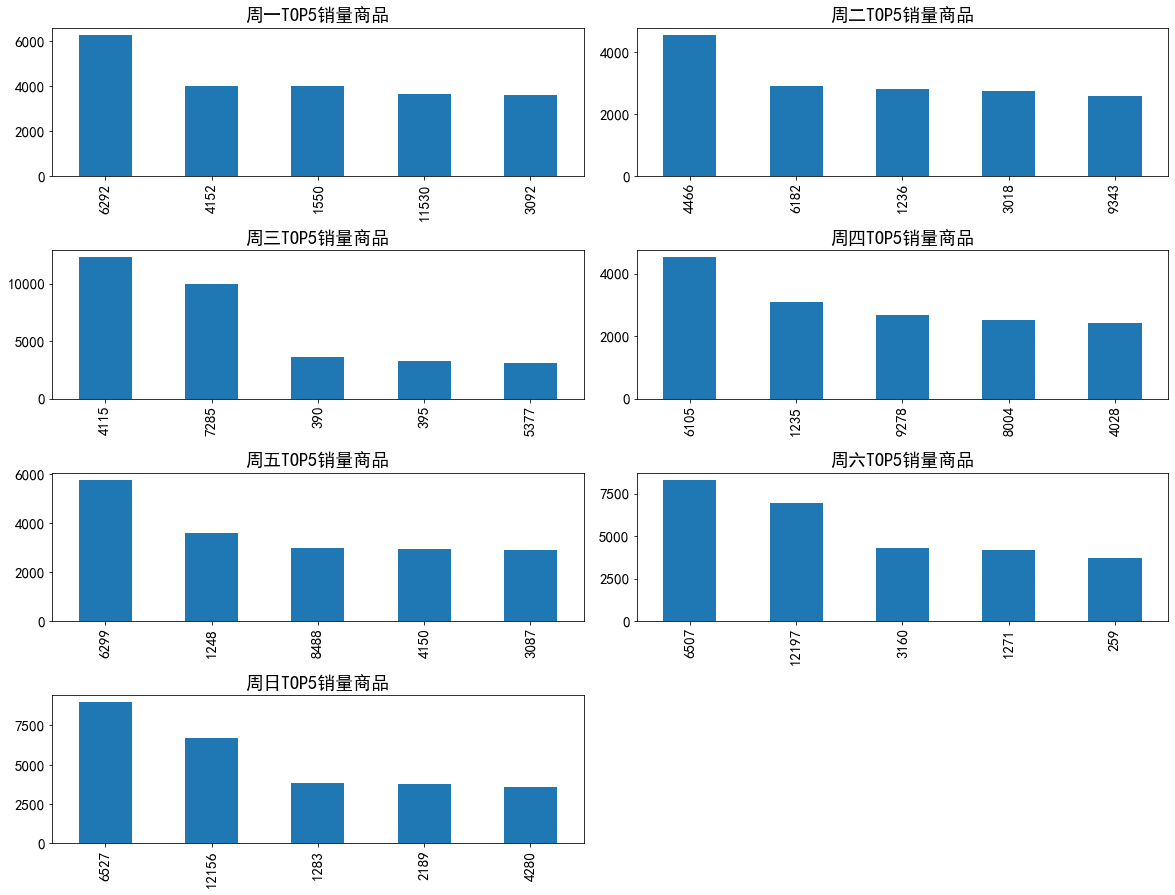

In [94]:
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.1,hspace=0.5)
plt.subplot(4, 2, 1)
sell_1_top5['ITEM_QUANTITY'].plot(kind='bar',title='周一TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 2)
sell_2_top5['ITEM_QUANTITY'].plot(kind='bar',title='周二TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 3)
sell_3_top5['ITEM_QUANTITY'].plot(kind='bar',title='周三TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 4)
sell_4_top5['ITEM_QUANTITY'].plot(kind='bar',title='周四TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 5)
sell_5_top5['ITEM_QUANTITY'].plot(kind='bar',title='周五TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 6)
sell_6_top5['ITEM_QUANTITY'].plot(kind='bar',title='周六TOP5销量商品',figsize=(20,15))

plt.subplot(4, 2, 7)
sell_7_top5['ITEM_QUANTITY'].plot(kind='bar',title='周日TOP5销量商品',figsize=(20,15))